## EDA With Red Wine Data

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests):
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data):
- 12 - quality (score between 0 and 10)

In [4]:
import pandas as pd

dataset_path = r"D:\Official\Studies\ML&AI\DSMastersPWSkills\DataScienceMasters-PWSkills\DSM-CourseMaterials\FeatureEnggAndEDA\Resources\Mar 24 English-20230707T083312Z-001\English\winequality-red.csv"

df = pd.read_csv(dataset_path)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#sunnary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#descriptive summary of the dataset

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.shape

(1599, 12)

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [18]:
sorted(df['quality'].unique())

[3, 4, 5, 6, 7, 8]

In [16]:
#missing values in the dataset

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

no missing data

In [20]:
#duplicate record check
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [22]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [23]:
df.shape

(1359, 12)

In [25]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<AxesSubplot:>

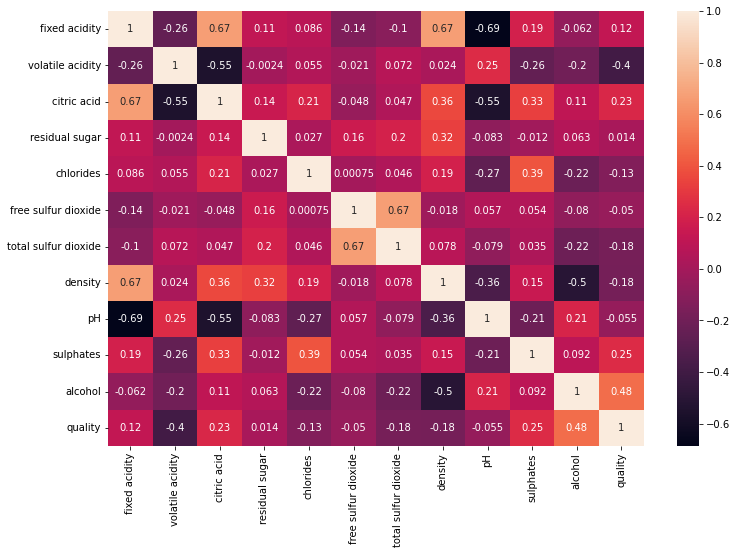

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

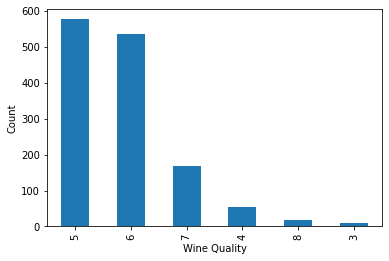

In [36]:
# freq distribution
df.quality.value_counts().plot(kind='bar')
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()
#imbalanced data set

In [29]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


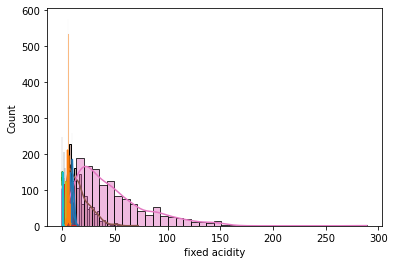

In [30]:
for col in df.columns:
    sns.histplot(df[col], kde=True)

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

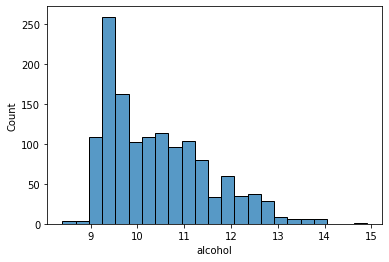

In [31]:
sns.histplot(df['alcohol'])

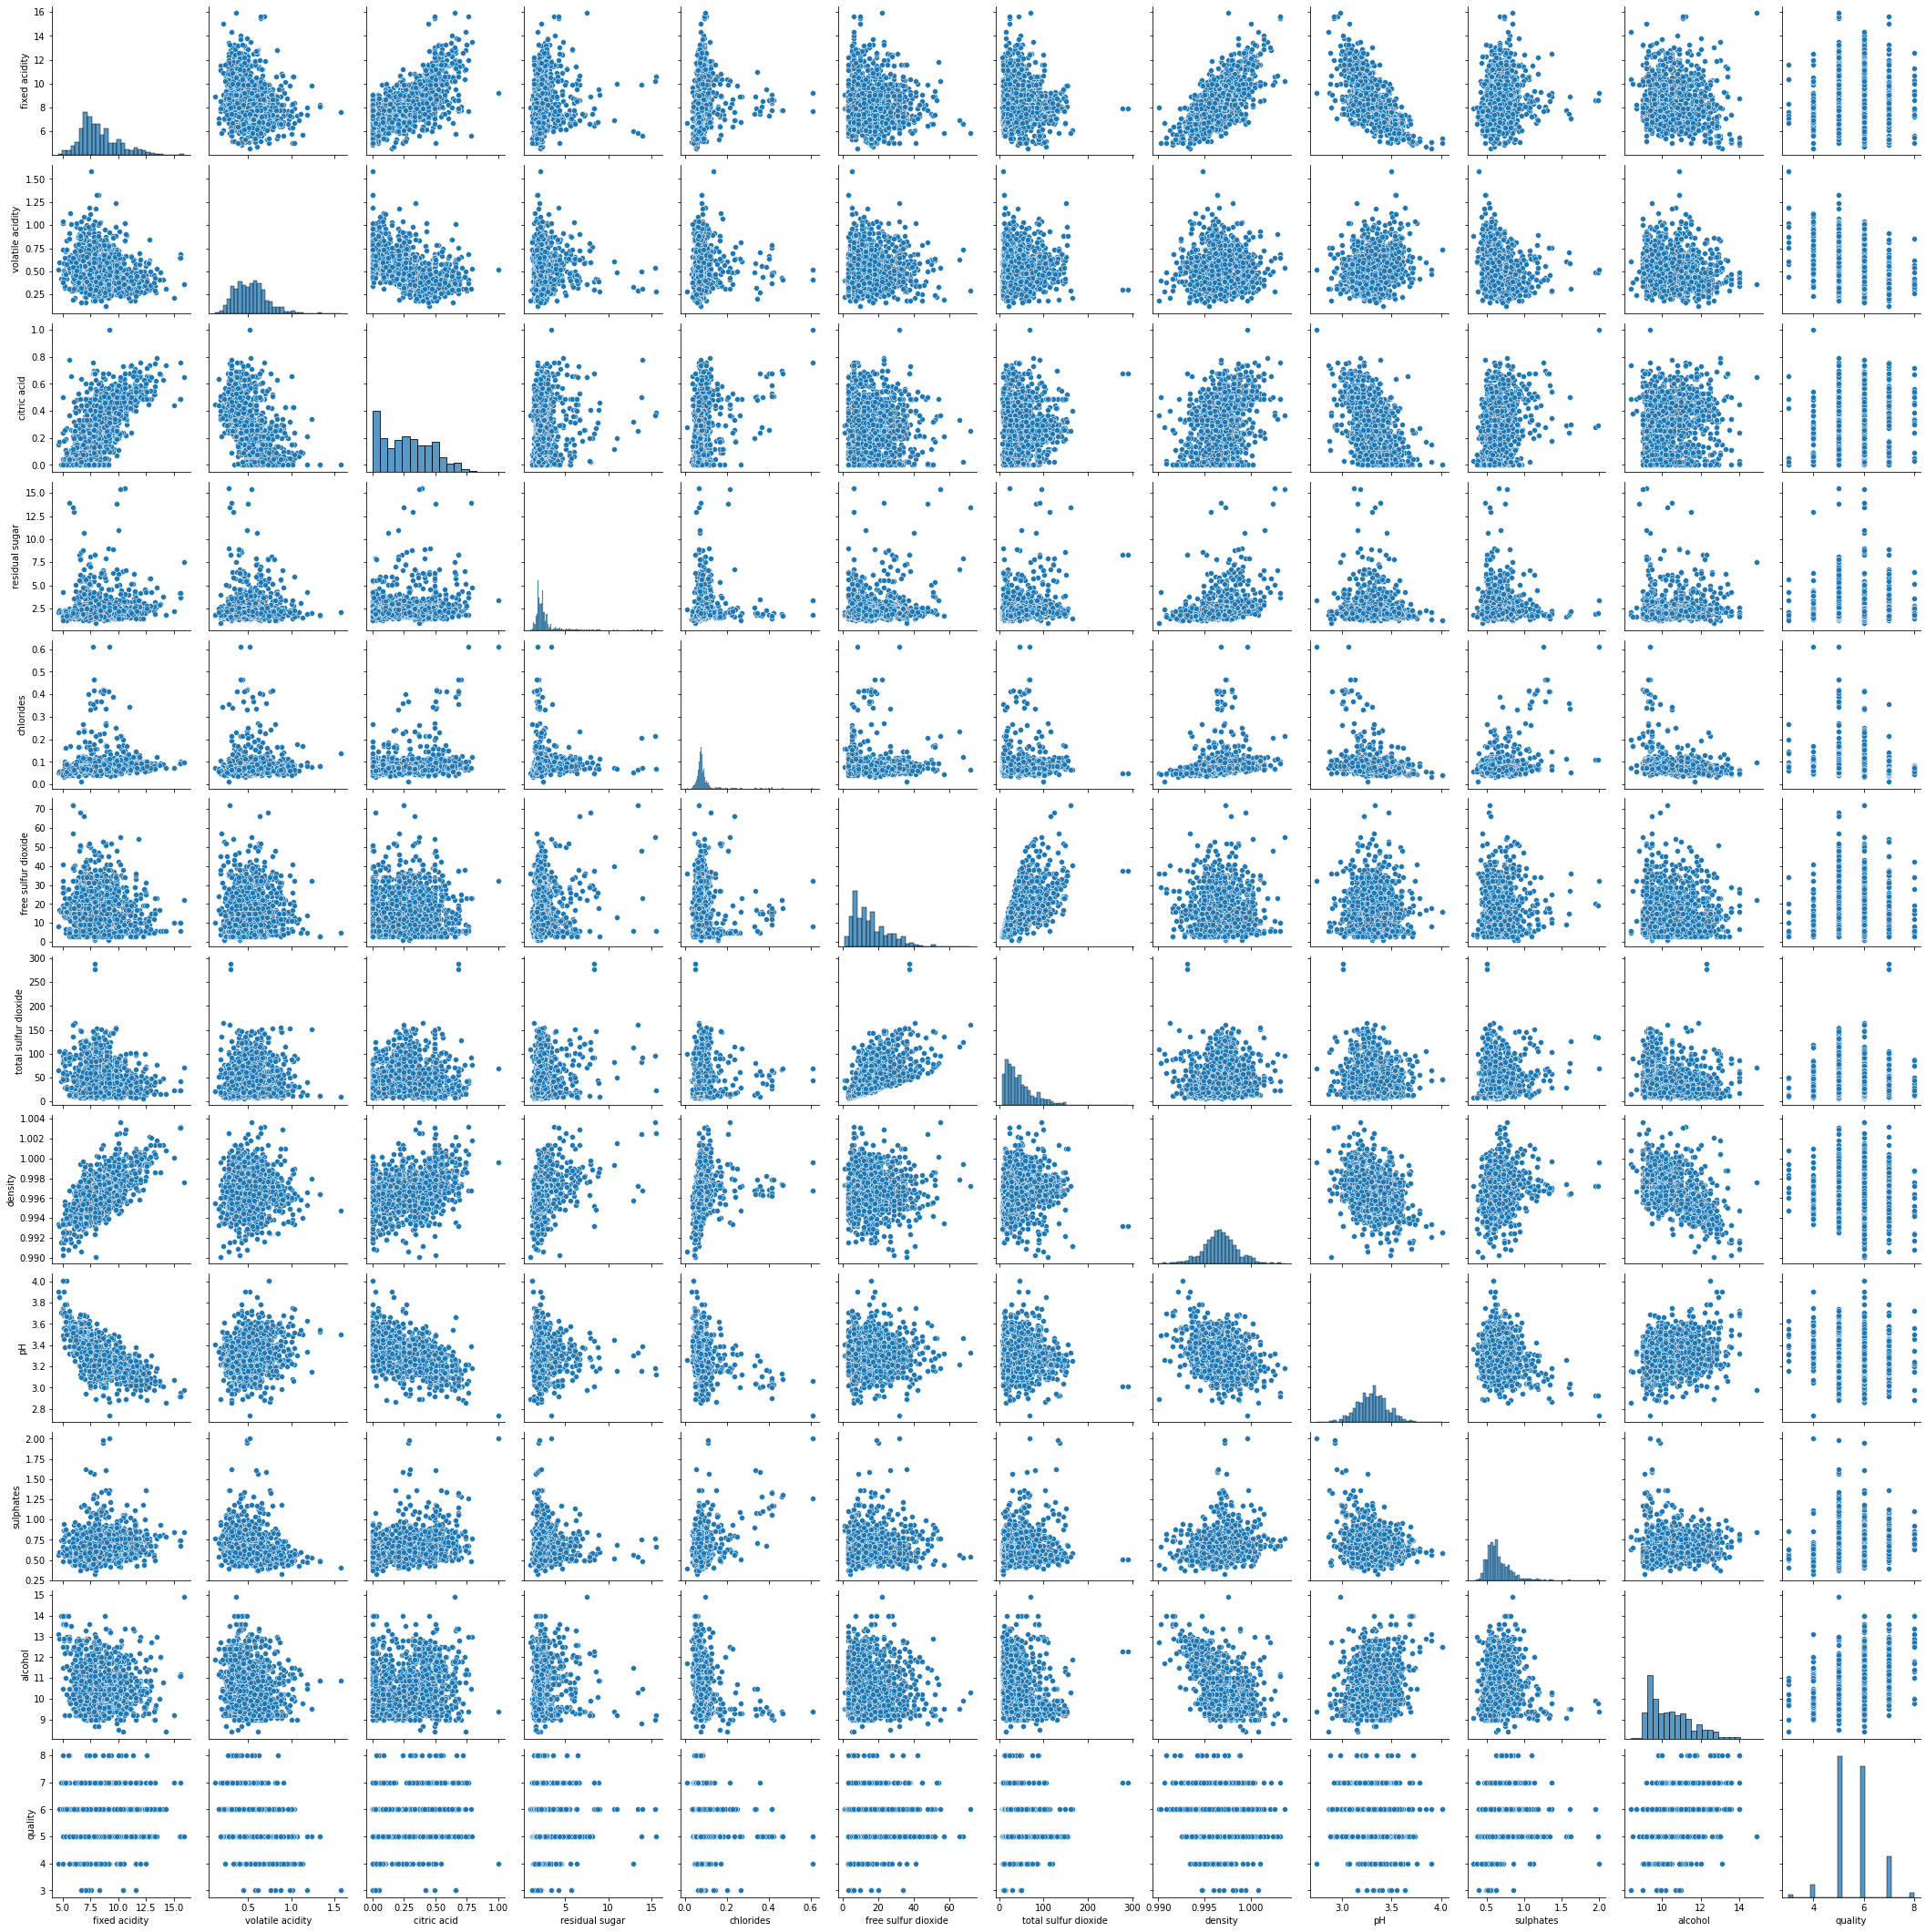

In [32]:
#univariate,bivariate,multivariate analysis
sns.pairplot(df)

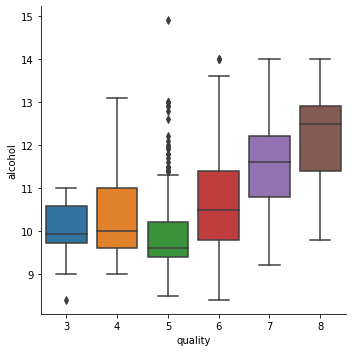

In [33]:
#categorical plot
sns.catplot(x='quality', y='alcohol', data=df, kind="box")

<AxesSubplot:xlabel='alcohol', ylabel='pH'>

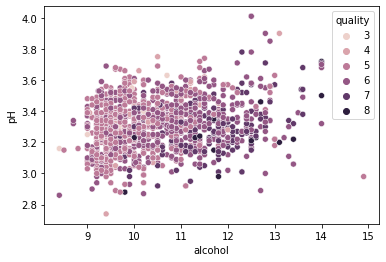

In [34]:
sns.scatterplot(x='alcohol',y='pH',hue='quality',data=df)

## EDA Student Performance Indicator

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [38]:
!pip install warnings

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import warnings
#warnings.filterwarnings(ignore)

In [44]:
stud_dataset_path = r"D:\Official\Studies\ML&AI\DSMastersPWSkills\DataScienceMasters-PWSkills\DSM-CourseMaterials\FeatureEnggAndEDA\Resources\Mar 24 English-20230707T083312Z-001\English\stud.csv"

In [47]:
df = pd.read_csv(stud_dataset_path)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [50]:
df.shape

(1000, 8)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [48]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [51]:
df.duplicated().sum()

0

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [53]:
## 3.1 Checking the number of uniques values of each columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [54]:
## Check the statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights or Observation
- From the above description of numerical data,all means are very close to each other- between 66 and 69
- All the standard deviation are also close- between 14.6- 15.19
- While there is a minimum of 0 for maths,other are having 17 and 10 value

In [55]:
#explore more about the data
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [62]:
[feature for feature in df.columns if df[feature].dtype == "O"]

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [63]:
#segregate numeric and categ vars
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

numerical_features, categorical_features

(['math_score', 'reading_score', 'writing_score'],
 ['gender',
  'race_ethnicity',
  'parental_level_of_education',
  'lunch',
  'test_preparation_course'])

In [65]:

df['total_score']=(df['math_score']+df['reading_score']+df['writing_score'])
df['average_score']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


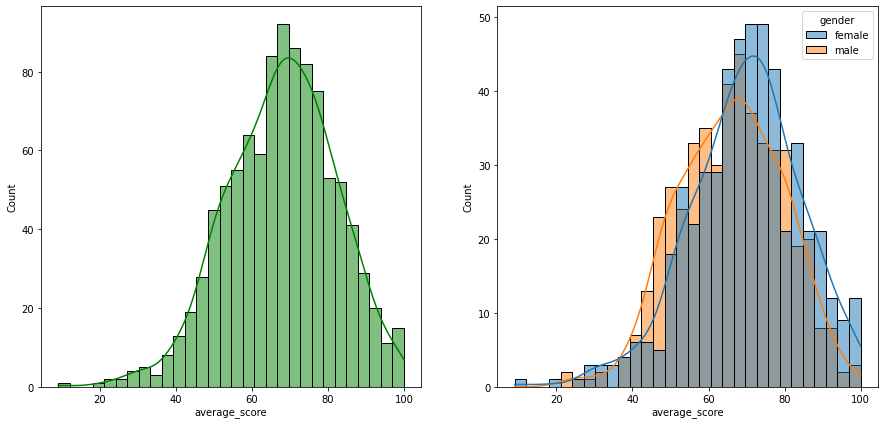

In [68]:
#explore more visuals
fig,axis = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color="g")
plt.subplot(122)
sns.histplot(data=df, x="average_score", bins=30, kde=True, hue="gender")
plt.show()

female students perform better than male students

<AxesSubplot:xlabel='average_score', ylabel='Count'>

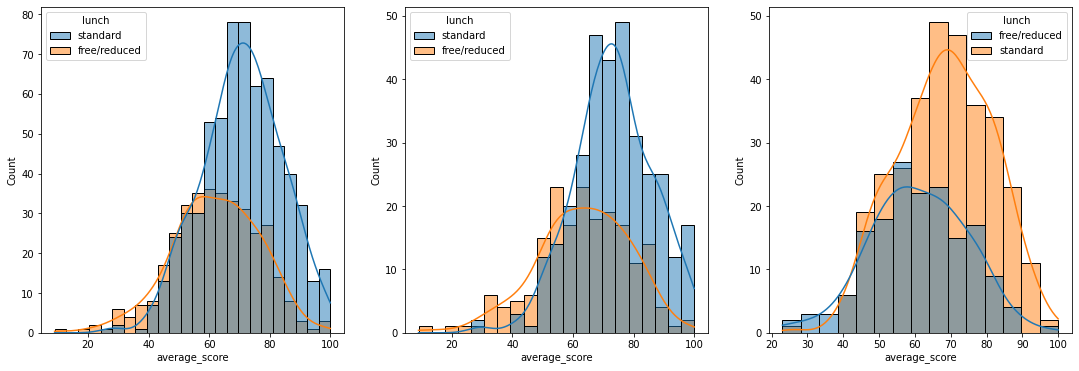

In [74]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x="average_score", kde=True, hue="lunch")
plt.subplot(142)
sns.histplot(data=df[df["gender"]=="female"], x="average_score", hue="lunch", kde=True)
plt.subplot(143)
sns.histplot(data=df[df["gender"]=="male"], x="average_score", kde=True, hue="lunch")

## Insights
- Standard Lunch help students perform well in exams
- Standard lunch helps perform well in exams be it a male of female

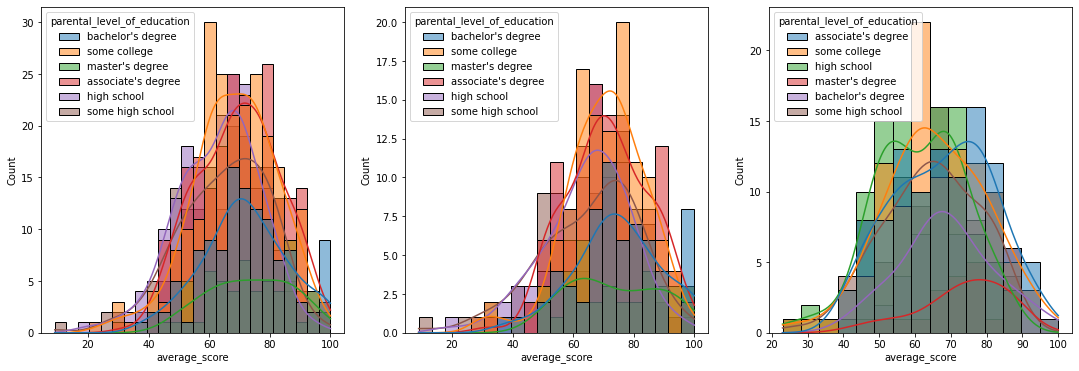

In [75]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x="average_score", hue="parental_level_of_education", kde=True)
plt.subplot(142)
sns.histplot(data=df[df["gender"]=="female"], x="average_score", hue="parental_level_of_education", kde=True)
plt.subplot(143)
sns.histplot(data=df[df["gender"]=="male"], x="average_score", hue="parental_level_of_education", kde=True)
plt.show()

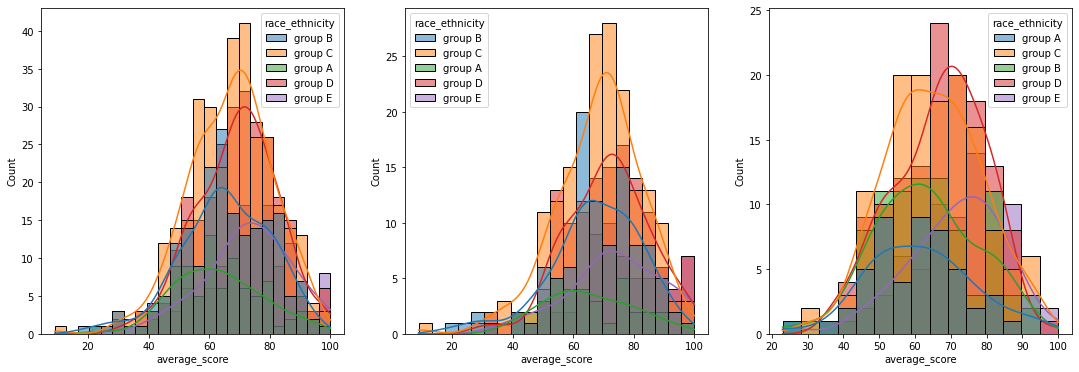

In [76]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x="average_score", hue="race_ethnicity", kde=True)
plt.subplot(142)
sns.histplot(data=df[df["gender"]=="female"], x="average_score", hue="race_ethnicity", kde=True)
plt.subplot(143)
sns.histplot(data=df[df["gender"]=="male"], x="average_score", hue="race_ethnicity", kde=True)
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

In [ ]:
sns.pairplot(df)

In [77]:
df.corr()

,math_score,reading_score,writing_score,total_score,average_score
math_score,1.000000,0.817580,0.802642,0.918746,0.918746
reading_score,0.817580,1.000000,0.954598,0.970331,0.970331
writing_score,0.802642,0.954598,1.000000,0.965667,0.965667
total_score,0.918746,0.970331,0.965667,1.000000,1.000000
average_score,0.918746,0.970331,0.965667,1.000000,1.000000


<AxesSubplot:>

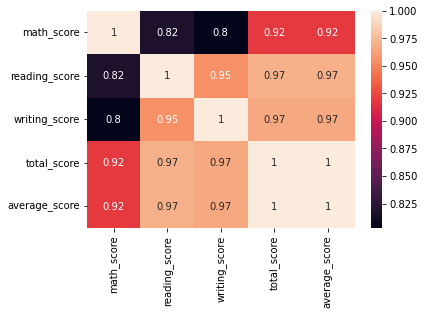

In [78]:
sns.heatmap(df.corr(), annot=True)

# Algerian Forest Fires Dataset Project EDA Part

## 1. UNDERSTANDING THE GIVEN TASK
#### Task Given by instructor Krish Naik
* Solve in ipynb:
1. Import the dataset.
https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#
2. Do proper EDA(analysis) of your dataset and create a report
3. Then perform necessary preprocessing steps


## 3. DATA EXPLORATION

* In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting Forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try to gather as many insights from it.


Below are tasks to be performed in EDA:

**1. Importing Libraries**


**2. Data Cleaning for EDA Report** 

**3. Exploratory Data Analysis (EDA) on all Features**


### 3.1 Import Libraries

In [159]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [160]:
Algerian_forest_fire_dataset = r"D:\Official\Studies\ML&AI\DSMastersPWSkills\DataScienceMasters-PWSkills\DSM-CourseMaterials\FeatureEnggAndEDA\Resources\Mar 24 English-20230707T083312Z-001\English\Algerian_forest_fires_dataset_UPDATE (6) (1).csv"
df = pd.read_csv(Algerian_forest_fire_dataset, header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [161]:
data = df.to_dict(orient="records")
data

[{'day': '01',
  'month': '06',
  'year': '2012',
  'Temperature': '29',
  ' RH': '57',
  ' Ws': '18',
  'Rain ': '0',
  'FFMC': '65.7',
  'DMC': '3.4',
  'DC': '7.6',
  'ISI': '1.3',
  'BUI': '3.4',
  'FWI': '0.5',
  'Classes  ': 'not fire   '},
 {'day': '02',
  'month': '06',
  'year': '2012',
  'Temperature': '29',
  ' RH': '61',
  ' Ws': '13',
  'Rain ': '1.3',
  'FFMC': '64.4',
  'DMC': '4.1',
  'DC': '7.6',
  'ISI': '1',
  'BUI': '3.9',
  'FWI': '0.4',
  'Classes  ': 'not fire   '},
 {'day': '03',
  'month': '06',
  'year': '2012',
  'Temperature': '26',
  ' RH': '82',
  ' Ws': '22',
  'Rain ': '13.1',
  'FFMC': '47.1',
  'DMC': '2.5',
  'DC': '7.1',
  'ISI': '0.3',
  'BUI': '2.7',
  'FWI': '0.1',
  'Classes  ': 'not fire   '},
 {'day': '04',
  'month': '06',
  'year': '2012',
  'Temperature': '25',
  ' RH': '89',
  ' Ws': '13',
  'Rain ': '2.5',
  'FFMC': '28.6',
  'DMC': '1.3',
  'DC': '6.9',
  'ISI': '0',
  'BUI': '1.7',
  'FWI': '0',
  'Classes  ': 'not fire   '},
 {'day': '0

In [162]:
#Insert records in the dataset into MongoDB collection "hotel_records"
db.fire_records.insert_many(data)
print("all the data has been exported to mongo db successfully")

NameError: name 'db' is not defined

In [163]:
#Convert list into Dataframe
df = pd.DataFrame(list_cursor)
df.drop('_id', axis=1, inplace=True)
df

NameError: name 'list_cursor' is not defined

In [164]:
df.info() #some cols have spaces

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [165]:
rename_list = [ (feature, feature.strip()) for feature in df.columns]
rename_list

[('day', 'day'),
 ('month', 'month'),
 ('year', 'year'),
 ('Temperature', 'Temperature'),
 (' RH', 'RH'),
 (' Ws', 'Ws'),
 ('Rain ', 'Rain'),
 ('FFMC', 'FFMC'),
 ('DMC', 'DMC'),
 ('DC', 'DC'),
 ('ISI', 'ISI'),
 ('BUI', 'BUI'),
 ('FWI', 'FWI'),
 ('Classes  ', 'Classes')]

In [166]:
rename_dict = dict(rename_list)
rename_dict

{'day': 'day',
 'month': 'month',
 'year': 'year',
 'Temperature': 'Temperature',
 ' RH': 'RH',
 ' Ws': 'Ws',
 'Rain ': 'Rain',
 'FFMC': 'FFMC',
 'DMC': 'DMC',
 'DC': 'DC',
 'ISI': 'ISI',
 'BUI': 'BUI',
 'FWI': 'FWI',
 'Classes  ': 'Classes'}

In [167]:
# rename the columns by trimming the spaces
df.rename(columns=rename_dict, inplace=True)

In [168]:
df.info() #spaces are trimmed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


all features are objects, need to convert to numerical

## 3.4 Data Cleaning

In [169]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [170]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [171]:
df.loc[:122, 'Region']=1
df.loc[122:, 'Region']=2
df['Region'] = df['Region'].astype(int)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [172]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [173]:
df.dropna(inplace=True)
df.shape

(244, 15)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 29.5+ KB


In [175]:
df[df.applymap(np.isreal).any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [176]:
df.iloc[[123]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2


In [177]:
#remove 123 row

df.drop(123, inplace=True)


In [178]:
df.reset_index(drop=True, inplace=True)

In [179]:
df['Classes'] = df['Classes'].apply(lambda x: 1 if str(x).strip() == "fire" else 0).astype(int)

In [180]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [181]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [182]:
objects = [col for col in df.columns if df[col].dtypes=="O"]
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [183]:
df[objects] = df[objects].astype(float)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int32  
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(8)
memory usage: 21.0 KB


In [185]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


**Data Cleaning in target variable**

In [186]:
df.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

Region 1 --> Bejaia Region

In [188]:
df[df['Region']==1]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,0,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,1,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,0,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,0,1


Region 2 --> Sidi-Bel Abbes Region

In [189]:
df[df["Region"]==2]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2


In [190]:
df_cleaned = df.copy()

### 3.5 Exploratory Data Analysis (EDA)

In [209]:
#Droping Year features 
df1 = df.drop(['day','month','year'], axis=1)
df1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2


**Visualization of Distribution**

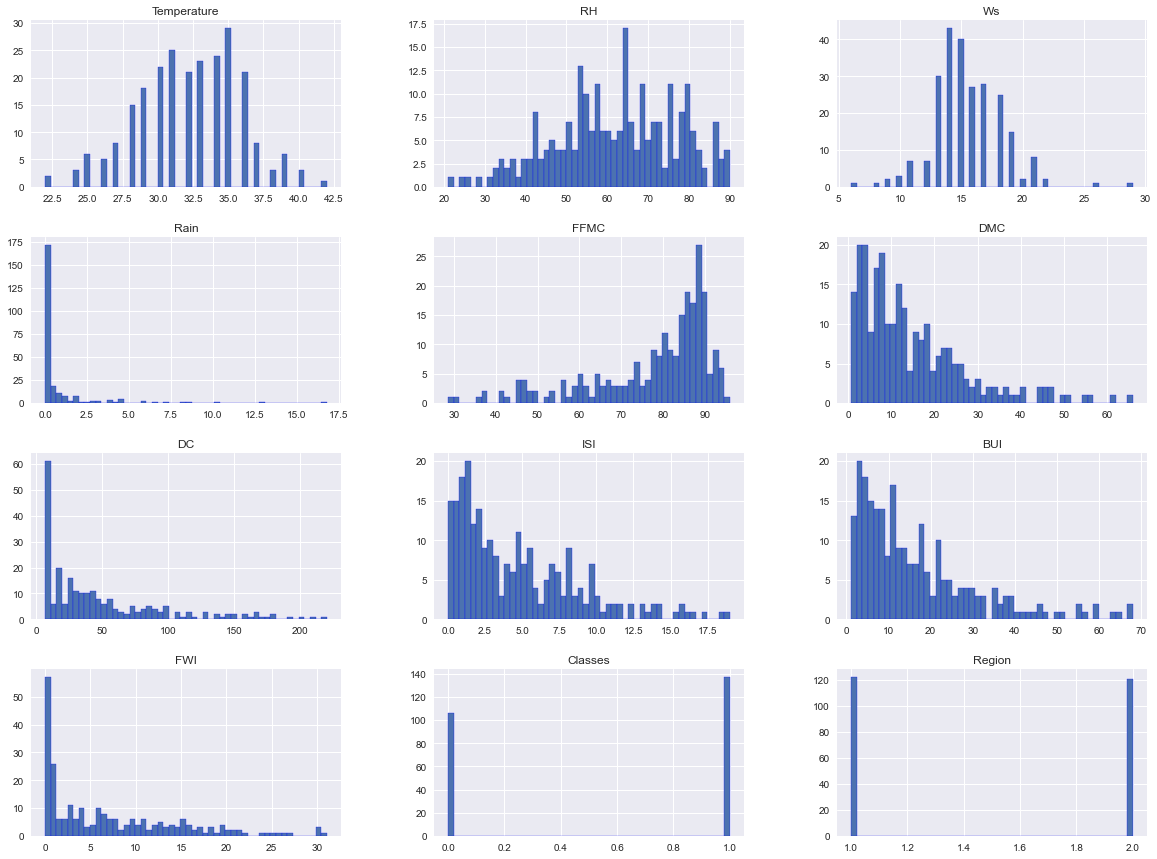

In [210]:
# PLot density plot for all features

plt.style.use("seaborn")
df1.hist(bins=50, figsize=(20,15), ec = "b")
plt.show()

In [196]:
#percentage for piechart
percentage = df1.Classes.value_counts(normalize=True)*100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

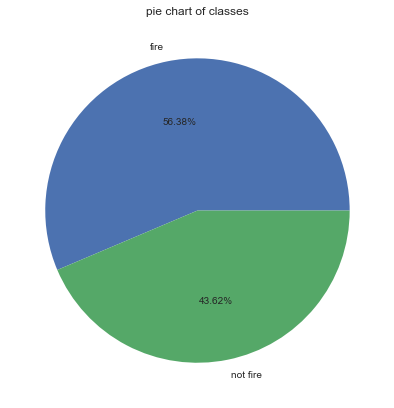

In [198]:
class_labels = ["fire", "not fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage, labels=class_labels, autopct="%1.2f%%")
plt.title("pie chart of classes")
plt.show()

**Checking Multicollinearity**

In [212]:
# correlation chart
k=len(df1.columns)
df1.corr().nlargest(k, 'Classes')["Classes"]


Classes        1.000000
FFMC           0.769492
ISI            0.735197
FWI            0.719216
BUI            0.586639
DMC            0.585658
Temperature    0.516015
DC             0.511123
Region         0.162347
Ws            -0.069964
Rain          -0.379097
RH            -0.432161
Name: Classes, dtype: float64

In [214]:
cols = df1.corr().nlargest(k, 'Classes')["Classes"].index
cols

Index(['Classes', 'FFMC', 'ISI', 'FWI', 'BUI', 'DMC', 'Temperature', 'DC',
       'Region', 'Ws', 'Rain', 'RH'],
      dtype='object')

In [215]:
cm = np.corrcoef(df1[cols].values.T)
cm

array([[ 1.00000000e+00,  7.69492297e-01,  7.35197388e-01,
         7.19216149e-01,  5.86639489e-01,  5.85657769e-01,
         5.16015487e-01,  5.11123334e-01,  1.62346663e-01,
        -6.99636329e-02, -3.79097165e-01, -4.32160741e-01],
       [ 7.69492297e-01,  1.00000000e+00,  7.40006828e-01,
         6.91131971e-01,  5.92011015e-01,  6.03607641e-01,
         6.76568145e-01,  5.07396659e-01,  2.22240716e-01,
        -1.66548273e-01, -5.43906188e-01, -6.44873465e-01],
       [ 7.35197388e-01,  7.40006828e-01,  1.00000000e+00,
         9.22894934e-01,  6.44092598e-01,  6.80454326e-01,
         6.03870559e-01,  5.08643247e-01,  2.63197088e-01,
         8.53168910e-03, -3.47483929e-01, -6.86667043e-01],
       [ 7.19216149e-01,  6.91131971e-01,  9.22894934e-01,
         1.00000000e+00,  8.57973096e-01,  8.75864159e-01,
         5.66669878e-01,  7.39520556e-01,  1.97102329e-01,
         3.23677727e-02, -3.24421559e-01, -5.80956747e-01],
       [ 5.86639489e-01,  5.92011015e-01,  6.4409259

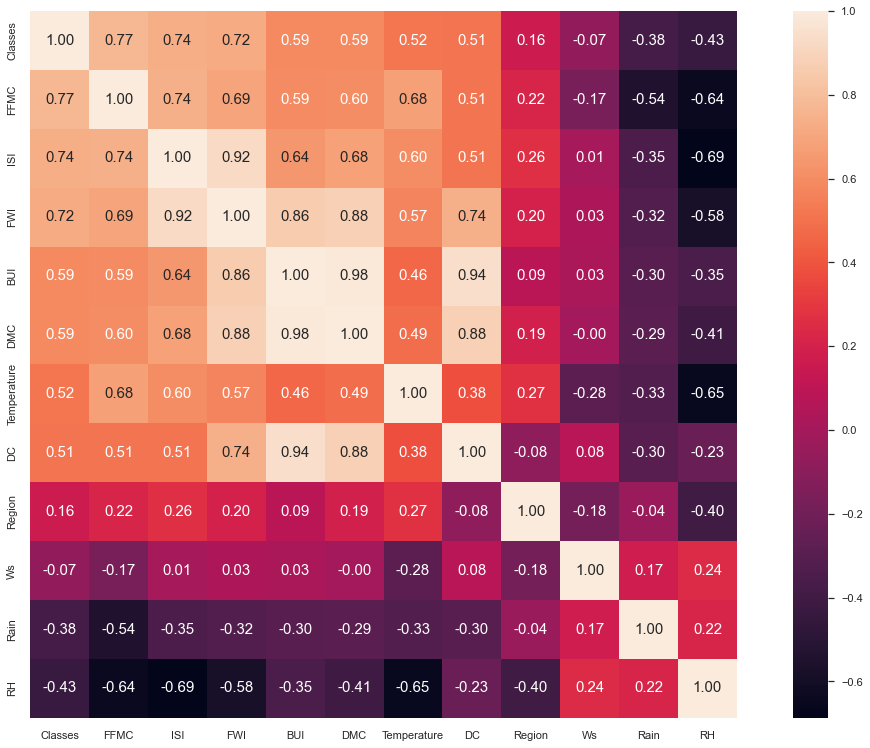

In [217]:
# ploting the chart by combining the above steps
k = len(df1.columns)
cols = df1.corr().nlargest(k, "Classes")["Classes"].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale = 1)
f, ax = plt.subplots(figsize=(20,13))
hm = sns.heatmap(cm, annot=True, square=True, fmt=".2f", annot_kws={"size":15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Canadian Forest Fire Weather Index (FWI) System
This column can be considered for Regression problem

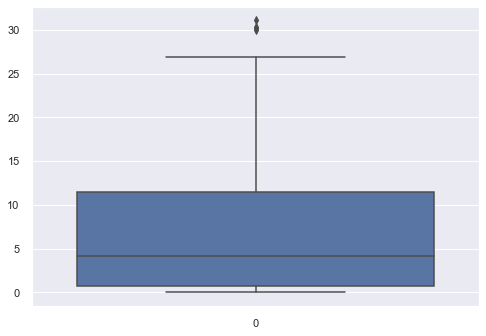

In [218]:
#Boxplot
ax = sns.boxplot(df1["FWI"])

### **Monthwise Fire Analysis**

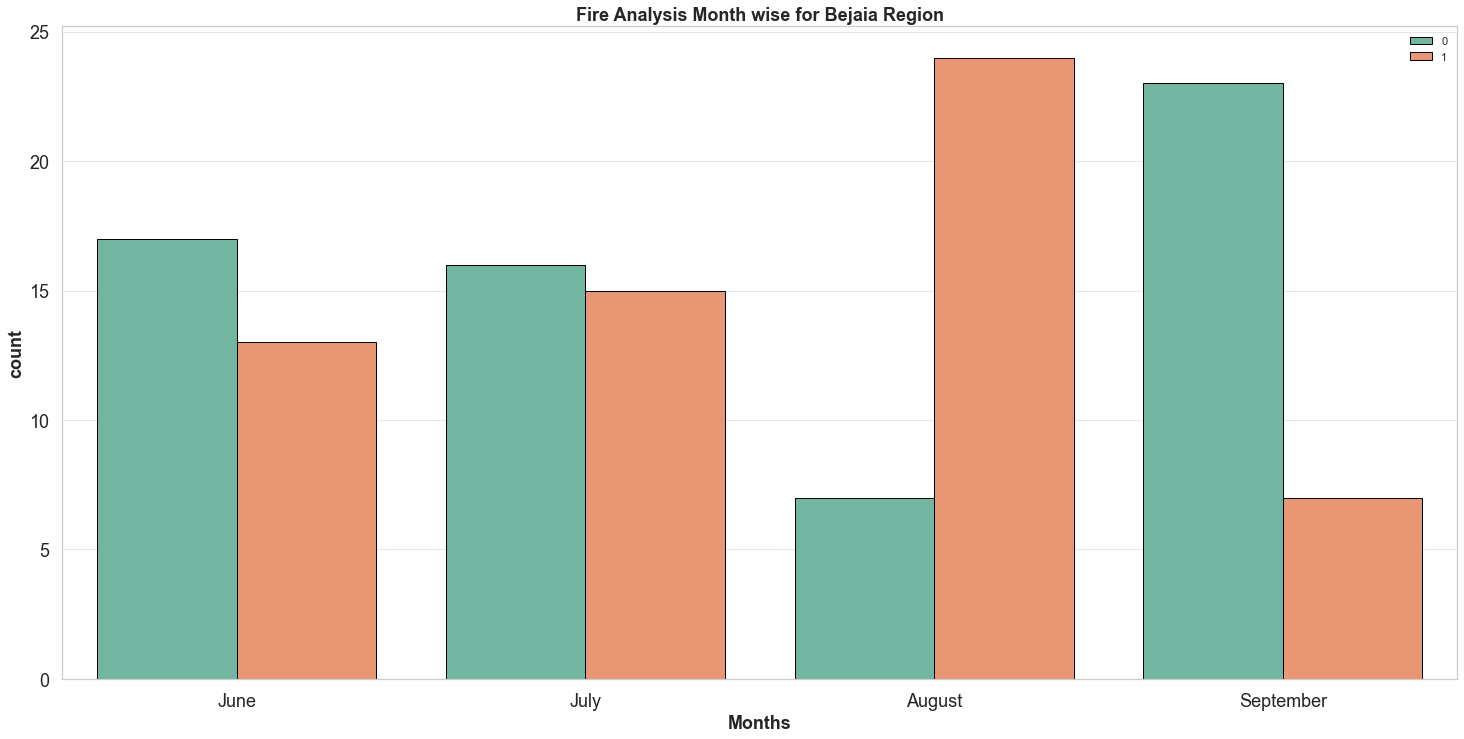

In [229]:
df_bejaia = df.loc[df["Region"]==1]
plt.subplots(figsize = (25,12))
sns.set_style("whitegrid")
sns.countplot(data=df_bejaia, x="month", hue="Classes", ec = "black", palette="Set2")
plt.title("Fire Analysis Month wise for Bejaia Region", fontsize=18, weight="bold")
plt.xlabel("Months", weight="bold", fontsize=18)
plt.ylabel("count", weight="bold", fontsize=18)
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',] , fontsize=18)
plt.yticks(fontsize=18)
plt.grid(alpha=0.5, axis="y")
plt.show()

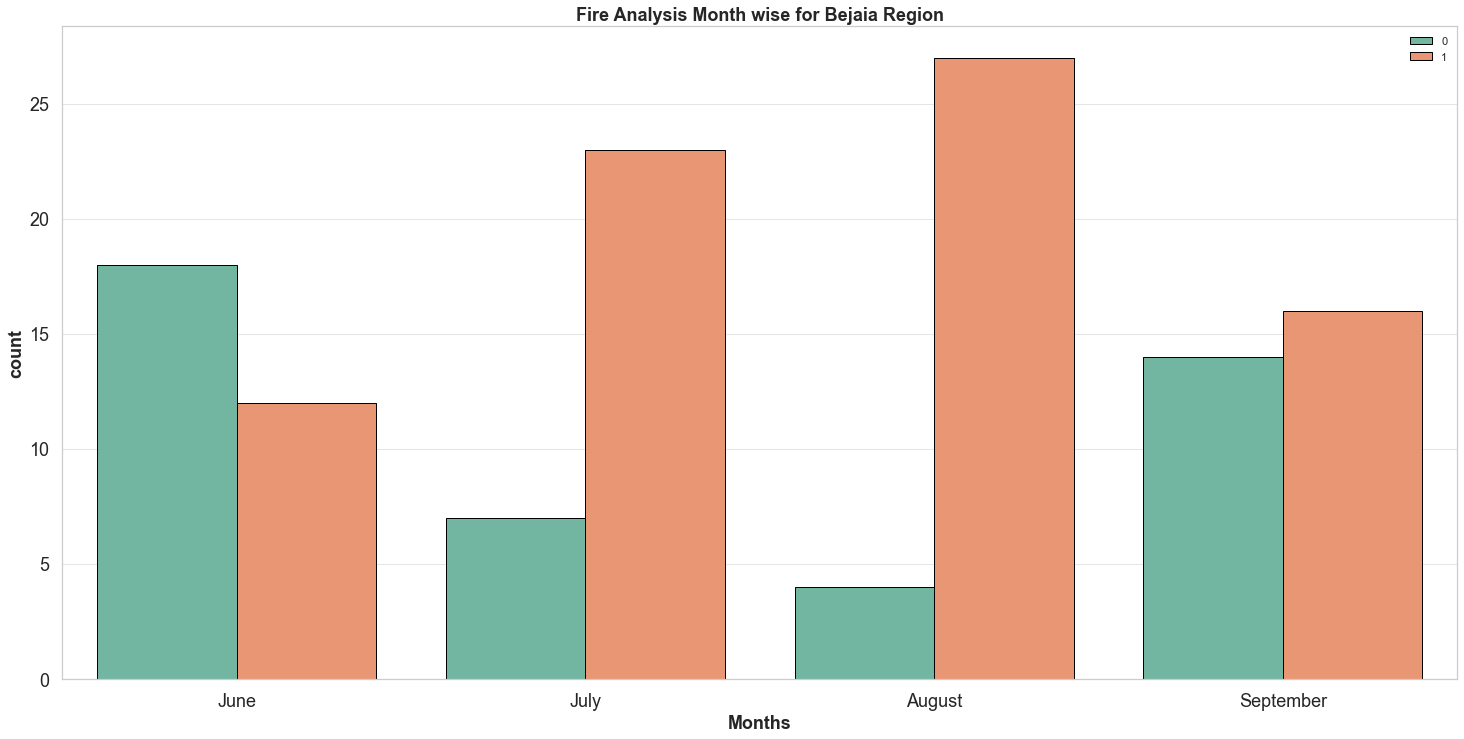

In [230]:
df_Sidibel = df.loc[df["Region"]==2]
plt.subplots(figsize = (25,12))
sns.set_style("whitegrid")
sns.countplot(data=df_Sidibel, x="month", hue="Classes", ec = "black", palette="Set2")
plt.title("Fire Analysis Month wise for Bejaia Region", fontsize=18, weight="bold")
plt.xlabel("Months", weight="bold", fontsize=18)
plt.ylabel("count", weight="bold", fontsize=18)
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',] , fontsize=18)
plt.yticks(fontsize=18)
plt.grid(alpha=0.5, axis="y")
plt.show()

### 3.5 Exploratory Data Analysis (EDA) on all Features

In [231]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [244]:
df.Temperature.value_counts()

35    29
31    25
34    24
33    23
30    22
36    21
32    21
29    18
28    15
27     8
37     8
25     6
39     6
26     5
40     3
24     3
38     3
22     2
42     1
Name: Temperature, dtype: int64

[Text(0.5, 0, 'Temperature Max in Celsius degrees'),
 Text(0, 0.5, 'fire count')]

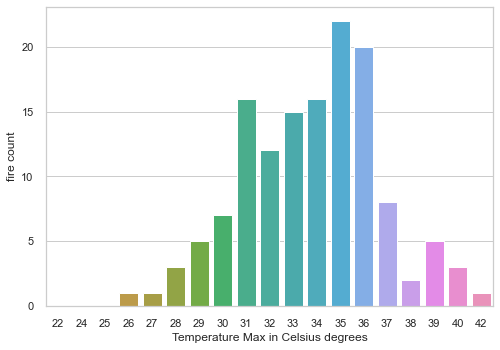

In [245]:
feature = "Temperature"
xlabel = "Temperature Max in Celsius degrees"
by_feature = df.groupby([feature], as_index=False)["Classes"].sum()
ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature, "Classes"]], estimator=sum)
ax.set(xlabel=xlabel, ylabel="fire count")

In [248]:
def barchart(feature, xlabel):
    plt.figure(figsize=(14,8))
    by_feature = df.groupby([feature], as_index=False)["Classes"].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature, "Classes"]], estimator=sum)
    ax.set(xlabel=xlabel, ylabel="fire count")

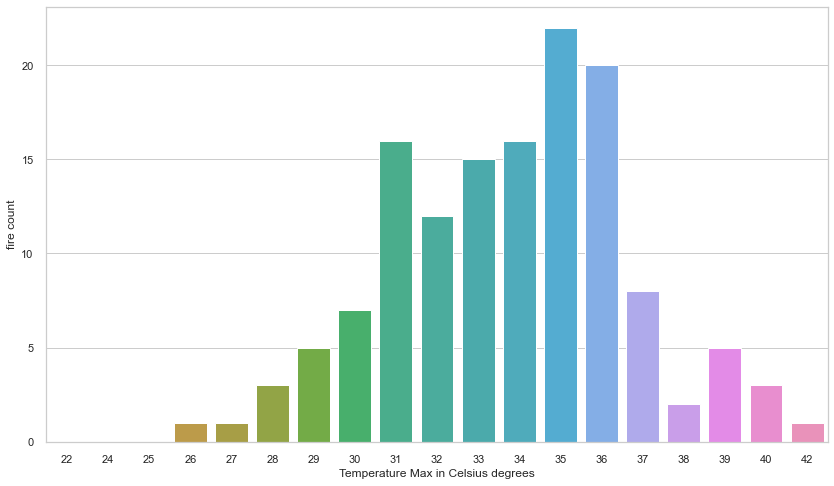

In [249]:
barchart("Temperature", "Temperature Max in Celsius degrees")

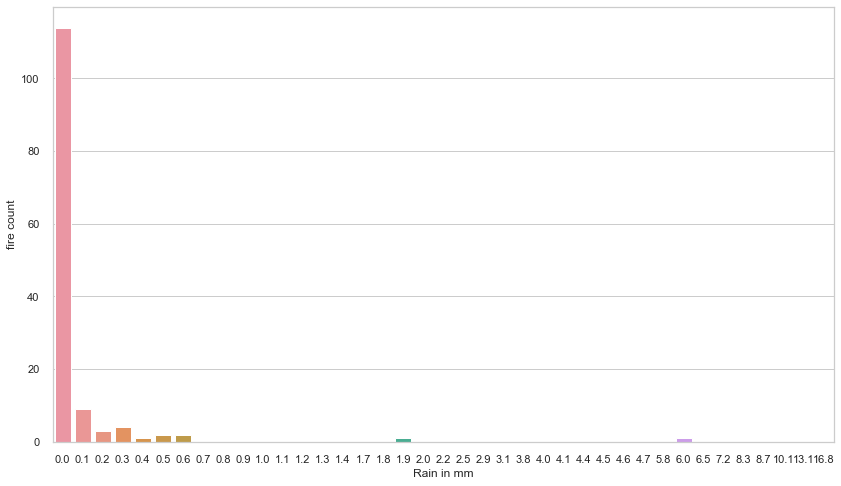

In [250]:
barchart('Rain', 'Rain in mm')

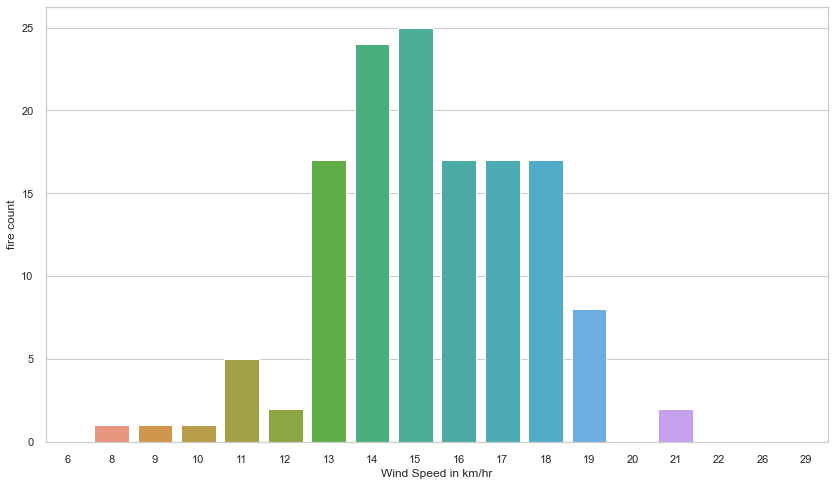

In [251]:
barchart('Ws', 'Wind Speed in km/hr')

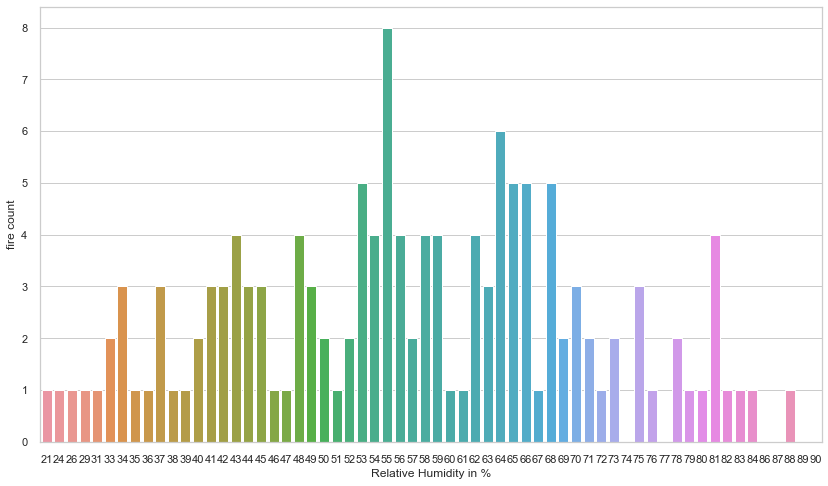

In [254]:
barchart('RH','Relative Humidity in %')

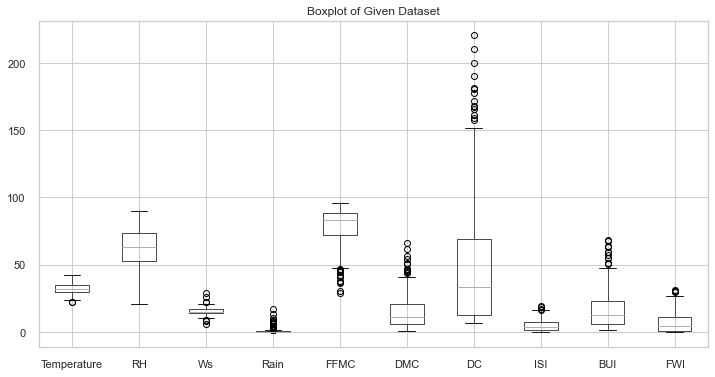

In [255]:
dftemp = df1.drop(['Classes', 'Region'], axis=1)
fig = plt.figure(figsize=(12, 6))
ax=dftemp.boxplot()
ax.set_title("Boxplot of Given Dataset")
plt.show()

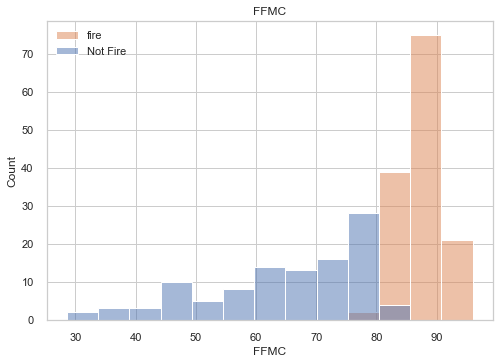

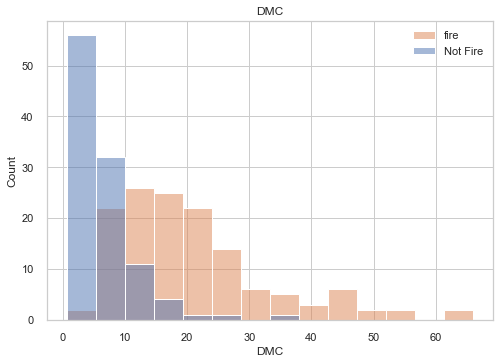

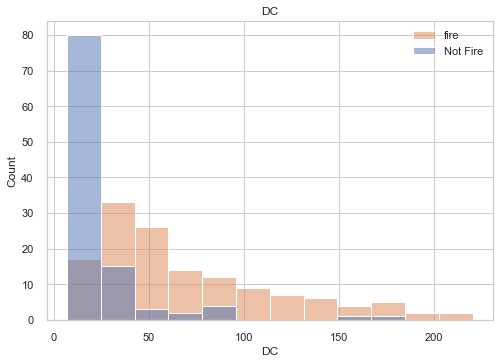

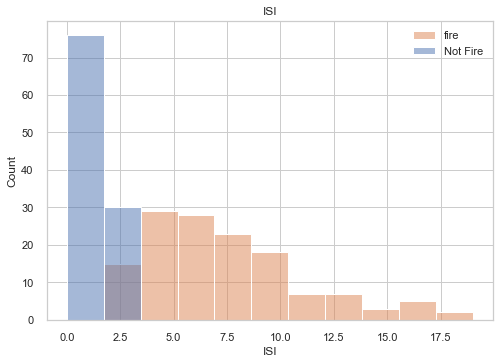

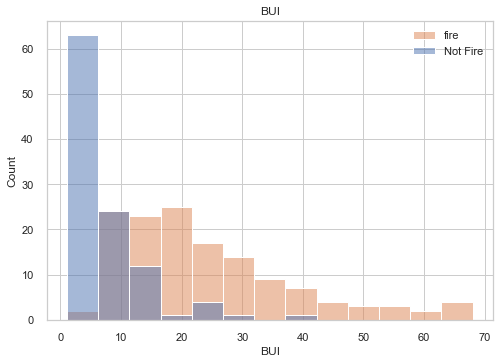

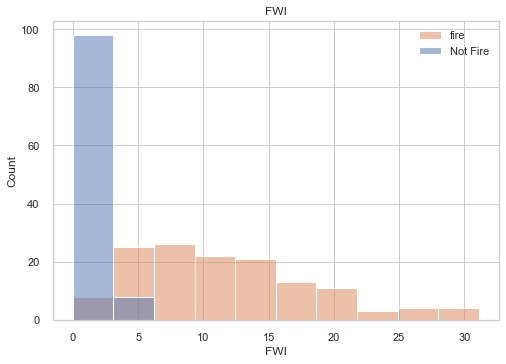

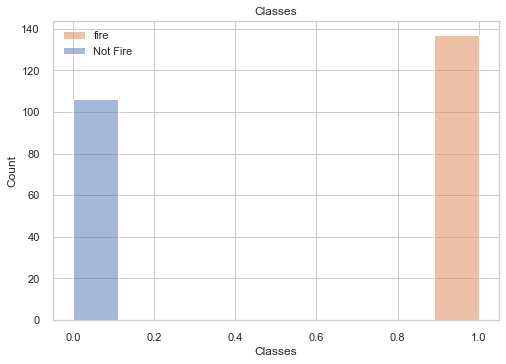

In [259]:
dftemp = df1.drop(['Region','Temperature','Rain','Ws','RH'], axis=1)
for col in dftemp:
    sns.histplot(data= dftemp, x=col, hue="Classes")
    plt.legend(labels=["fire", "Not Fire"])
    plt.title(col)
    plt.show()

### REPORT 
#### Weather System Report
* **Temperature** Highest Fire counts happened between **30-37 degree Celsius**
* **Rain** Highest Fire counts happened when there was no rain to very less rain ie. **0.0 to 0.3.**
* **Wind Speed** highest Fire count happened when the wind speed were between **13 to 19 Km/hr.**
* **Relative Humidity** highest fire count happened when the RH is between **50 to 80%.**


#### FWI System Components Report 
FWI (Canadian Forest Fire Weather Index)
* **Fine Fuel Moisture Code (FFMC) index** which ranges between *28.6 to 92.5*, 
    here **above 75** has higher chance of Forest fires.
    
* **Duff Moisture Code (DMC) index** which ranges between *1.1 to 65.9*, 
    here 1.1-10 has lower chance of Forest fires whereas above **10-30 DMC** has very high evidence of Forest fires in past.
    
* **Drought Code (DC) index** which ranges between *7 to 220.4*, 
    here 0-25 is safe and has lower chance of Forest fires whereas range **above 25 DC** has higher chance of forest fires.
    
* **Initial Spread Index (ISI) index** which ranges between *0 to 18*, 
    here 0-3 has lower Forest fires and **above 3 ISI** has higher chance of Forest fires.
    
* **Buildup Index (BUI) index** which ranges between *1.1 to 68*, 
    here 1.1 to 10 has lower Forest fire chance and **above 10 BUI has** higher chance of forest fires.
    
* **Fire Weather Index (FWI) Index** which ranges between *1 to 31.1*, 
    here 0-3 has lower chance of Forest fires and **3-25 FWI** has higher chance of forest fires.